# Hierarchical Forecasting with PyAF

In this document , we give a use case of hierarchcial forecasting wioth PyAF. 

We study the problem of forecasting France wine exportation by wine type (Champagne , Bordeaux, etc), variant (red , white, sparkling etc) and destination country.

A dataset has been built based on French government opendata gratefully provided by the foreign trade ministry. This dataset is available here : https://github.com/antoinecarme/TimeSeriesData/tree/master/Stat_FR_CommExt. 

Please note that the original dataset is generic and contains export data for all foreign trade products to all possible countries with a significant level of detail (cars, crops, living animals , legal weapons , ...).



## Data Overview

The dataset is a collection of 2872 monthly time series overserved on a period ranging from 2012-01-01 to 2016-09-01.

Each time series has 50 rows (some data are missing in 2015 , under investigation) and represents the export of a given type of wine, a given variant to a unique contry.

The time series column name is built by concatenating the three above informations.

To simplify, we will reduce the number of countries to the 10 most signficant (`wine-friendly`) ones. This reduces the number of columns to 176 ;)

In [45]:
import pandas as pd

filename = "https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/Stat_FR_CommExt/merged/French_Wine_Export_in_Euros_Some_Countries.csv"

French_Wine_Export_in_Euros_DF = pd.read_csv(filename);
French_Wine_Export_in_Euros_DF.head(5)


,Month,ALSACE_BLANC_BE,ALSACE_BLANC_CA,ALSACE_BLANC_CH,ALSACE_BLANC_CN,ALSACE_BLANC_DE,ALSACE_BLANC_GB,ALSACE_BLANC_HK,ALSACE_BLANC_JP,ALSACE_BLANC_NL,...,RHÔNE_ROUGE_CA,RHÔNE_ROUGE_CH,RHÔNE_ROUGE_CN,RHÔNE_ROUGE_DE,RHÔNE_ROUGE_GB,RHÔNE_ROUGE_HK,RHÔNE_ROUGE_JP,RHÔNE_ROUGE_NL,RHÔNE_ROUGE_OTHER,RHÔNE_ROUGE_US
0,2012-01-01,1131852,571940,257116,140013,357516,344274,51043,329883,624695,...,800628,650236,1127393,783952,1513332,335710,916965,314654,35418,1260510
1,2012-02-01,857289,585556,187917,89805,505896,424953,80220,239242,899144,...,795356,680567,188827,868576,1277664,197072,318522,516140,36604,2136484
2,2012-03-01,1438501,834142,679281,103577,583887,352675,102980,394945,1093638,...,873858,1318538,856382,627236,2343448,132200,605914,410308,43197,3264810
3,2012-04-01,986602,866221,523202,203456,515903,403517,52773,260953,874217,...,1004028,919493,460815,829432,1861188,128164,472522,290407,45396,2631466
4,2012-05-01,991668,1061702,611369,80327,767522,627232,78115,680323,994697,...,2098300,632778,239200,934532,2215922,202210,337894,284868,41469,2945175


In [38]:
French_Wine_Export_in_Euros_DF.describe()

,ALSACE_BLANC_BE,ALSACE_BLANC_CA,ALSACE_BLANC_CH,ALSACE_BLANC_CN,ALSACE_BLANC_DE,ALSACE_BLANC_GB,ALSACE_BLANC_HK,ALSACE_BLANC_JP,ALSACE_BLANC_NL,ALSACE_BLANC_OTHER,...,RHÔNE_ROUGE_CA,RHÔNE_ROUGE_CH,RHÔNE_ROUGE_CN,RHÔNE_ROUGE_DE,RHÔNE_ROUGE_GB,RHÔNE_ROUGE_HK,RHÔNE_ROUGE_JP,RHÔNE_ROUGE_NL,RHÔNE_ROUGE_OTHER,RHÔNE_ROUGE_US
count,5.000000e+01,5.000000e+01,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,5.000000e+01,50.000000,...,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,5.000000e+01,5.000000e+01,50.000000,5.000000e+01
mean,1.189956e+06,8.037735e+05,428923.380000,119348.360000,6.173951e+05,414037.100000,88636.820000,361437.900000,8.035454e+05,38337.801569,...,1.607702e+06,8.523710e+05,7.498312e+05,1.072562e+06,2.876061e+06,235678.640000,5.760031e+05,4.986103e+05,52907.080000,2.912355e+06
std,2.780384e+05,1.691507e+05,158179.648178,65116.609016,2.765474e+05,116398.158498,68347.582681,110140.042643,2.732401e+05,6088.988573,...,7.064099e+05,2.458533e+05,3.592653e+05,4.307817e+05,1.366642e+06,140071.773582,2.398091e+05,1.720202e+05,9667.885799,6.675896e+05
min,5.477480e+05,3.514620e+05,88329.000000,19546.000000,3.131500e+05,168388.000000,31864.000000,192553.000000,3.085880e+05,18550.156250,...,7.935600e+05,3.992940e+05,1.888270e+05,5.558550e+05,1.277664e+06,77550.000000,2.053840e+05,2.311020e+05,35238.000000,1.260510e+06
25%,1.004816e+06,6.791068e+05,316753.500000,82278.500000,4.801042e+05,333264.500000,52845.750000,293690.250000,6.061862e+05,35457.417067,...,1.047350e+06,6.819278e+05,5.089532e+05,7.219495e+05,2.025437e+06,152307.750000,3.751060e+05,3.725818e+05,46721.000000,2.500847e+06
50%,1.161726e+06,8.070940e+05,445554.500000,98656.000000,5.449660e+05,401774.500000,76561.500000,335180.000000,7.884350e+05,38715.394123,...,1.506712e+06,8.120535e+05,7.065070e+05,9.246160e+05,2.519672e+06,203395.000000,5.414685e+05,4.674045e+05,52305.000000,2.896628e+06
75%,1.323582e+06,8.880218e+05,542924.000000,161694.000000,6.549058e+05,515408.000000,102011.750000,417475.000000,8.980862e+05,41900.001008,...,1.936743e+06,1.023269e+06,9.285735e+05,1.207832e+06,3.018630e+06,257873.500000,7.998980e+05,6.143272e+05,59756.250000,3.380802e+06
max,2.166585e+06,1.216720e+06,857207.000000,317661.000000,1.871515e+06,635447.000000,510151.000000,680323.000000,1.458234e+06,52823.280702,...,3.946934e+06,1.334550e+06,1.755449e+06,2.312776e+06,8.652432e+06,879037.000000,1.076535e+06,1.063568e+06,71487.000000,4.664273e+06


To give an example, the following plot compares the export of Champagne to Germany, Japan and UK:  

In [41]:
%matplotlib inline

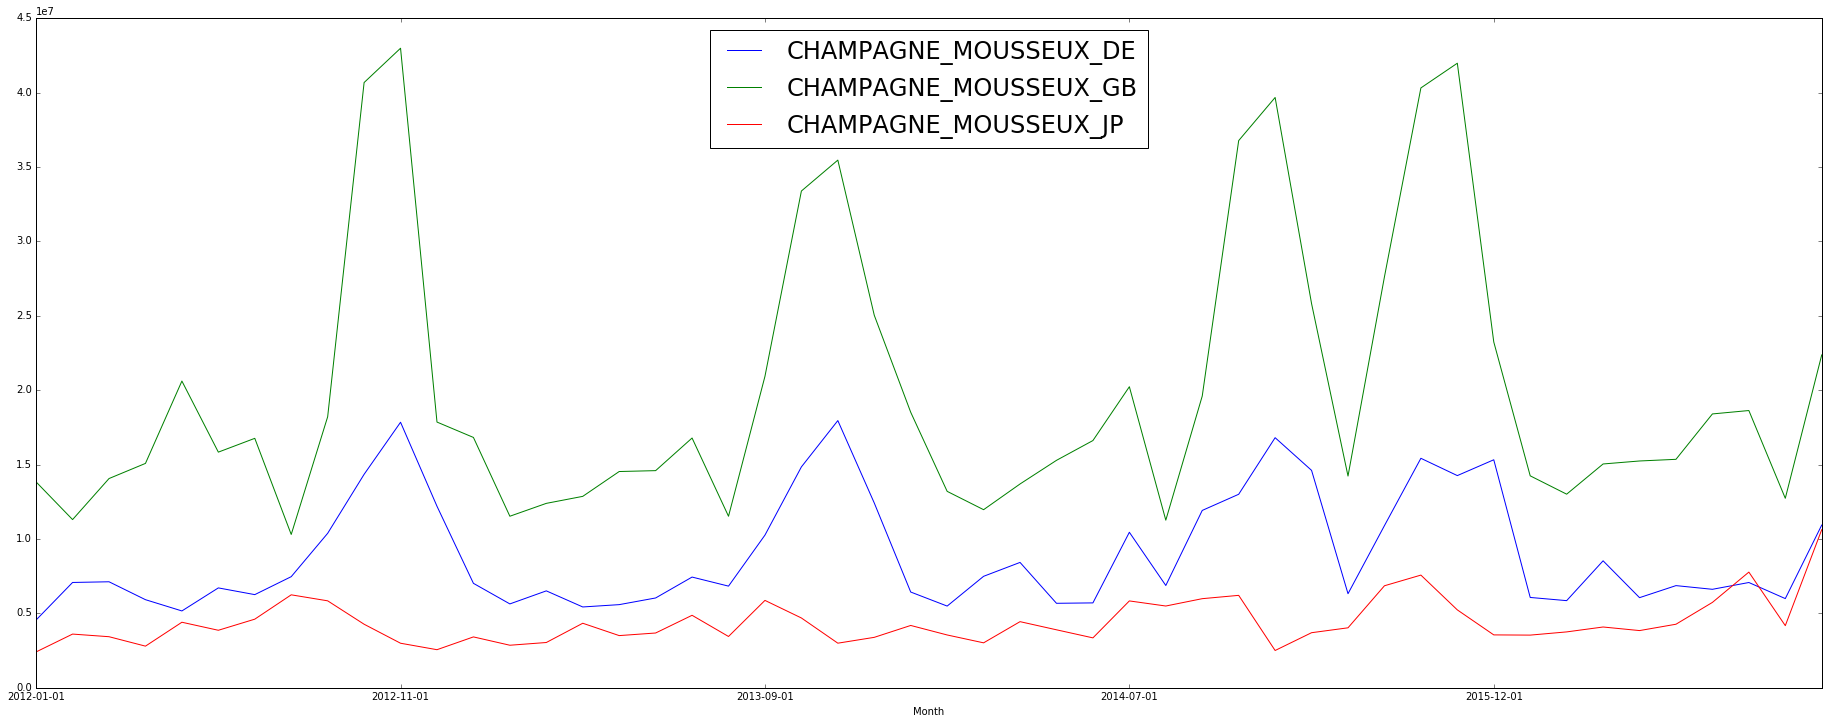

In [42]:
French_Wine_Export_in_Euros_DF.plot('Month' , 
                                    ['CHAMPAGNE_MOUSSEUX_DE', 'CHAMPAGNE_MOUSSEUX_GB' , 'CHAMPAGNE_MOUSSEUX_JP'],
                                   figsize=(32 , 12)).legend(loc='best', fontsize=24)

While the next one compares US consumption (in Euros) of red and white Bordeaux ;)

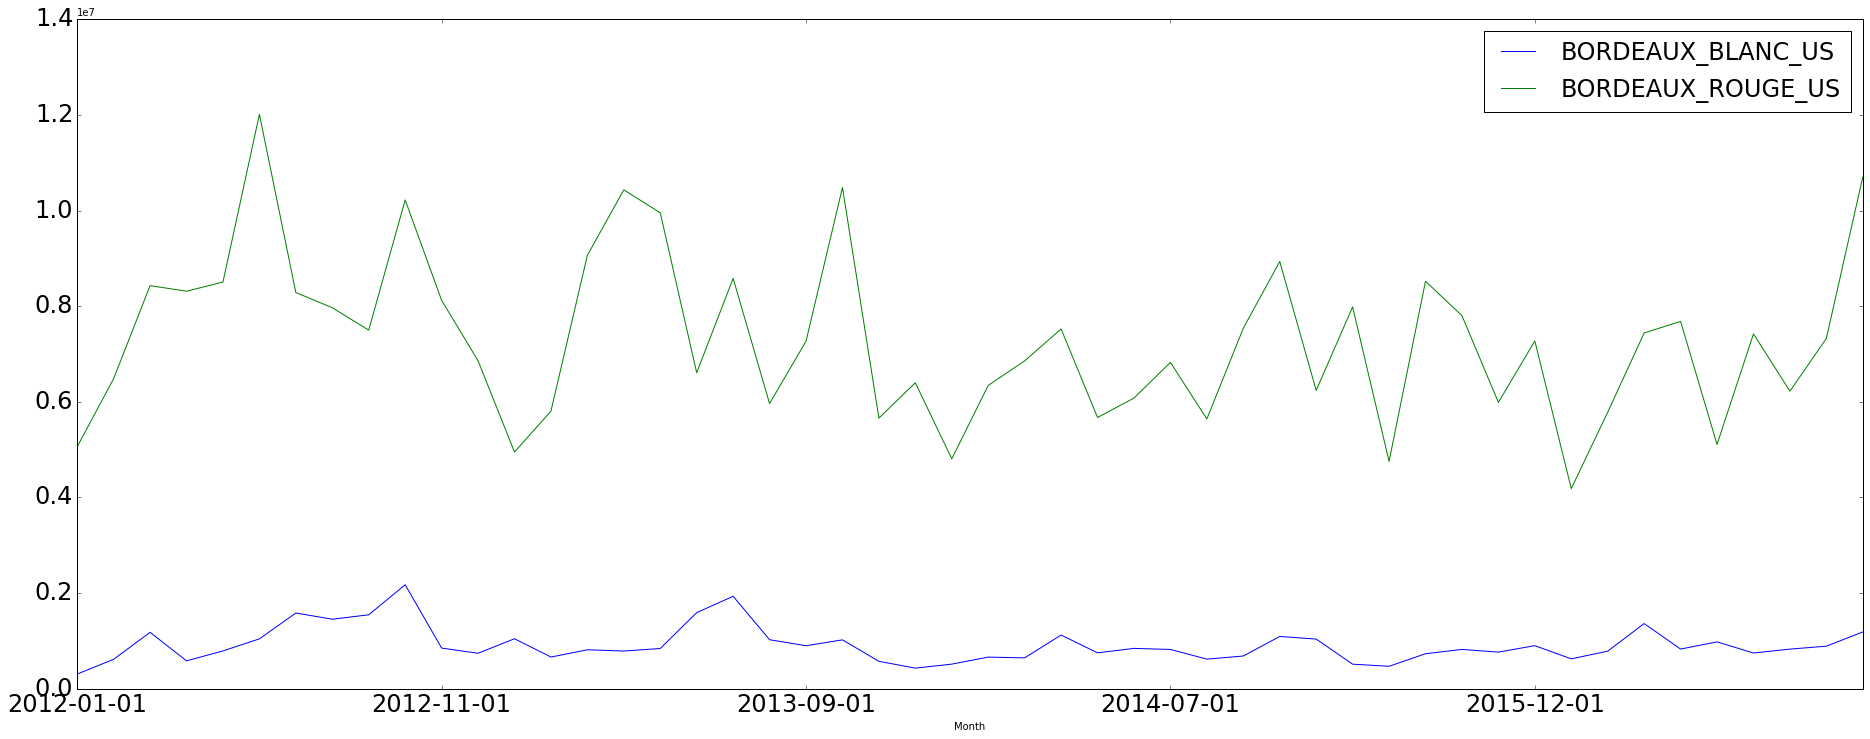

In [43]:
French_Wine_Export_in_Euros_DF.plot('Month' , 
                                    ['BORDEAUX_BLANC_US', 'BORDEAUX_ROUGE_US'],
                                    fontsize = 24,
                                    figsize=(32 , 12)).legend(loc='best', fontsize=24)

In [46]:
CN_columns = [col for col in French_Wine_Export_in_Euros_DF.columns if col.endswith('_CN') ]
French_Wine_Export_in_Euros_DF[CN_columns].describe()


,ALSACE_BLANC_CN,BEAUJOLAIS_ROUGE_CN,BORDEAUX_BLANC_CN,BORDEAUX_ROUGE_CN,BOURGOGNE_BLANC_CN,BOURGOGNE_ROUGE_CN,CHAMPAGNE_MOUSSEUX_CN,EUROPE_ROUGE_CN,FRANCE_BLANC_CN,FRANCE_MOUSSEUX_CN,FRANCE_ROUGE_CN,LANGUEDOC_ROUGE_CN,LOIRE_BLANC_CN,LOIRE_ROUGE_CN,OTHER_ROUGE_CN,RHÔNE_ROUGE_CN
count,50.000000,50.00000,5.000000e+01,5.000000e+01,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,5.000000e+01
mean,119348.360000,130292.47000,4.993186e+05,1.138432e+07,242575.340000,7.436432e+05,6.225160e+05,8.313372e+05,12978.062000,93298.256667,11185.281403,1.304245e+06,48771.330000,92016.740000,52969.948000,7.498312e+05
std,65116.609016,102214.45714,2.936971e+05,3.081051e+06,99492.736867,4.176045e+05,3.812781e+05,2.337996e+05,24705.479992,63521.773261,13888.069451,6.352887e+05,27922.200988,54704.609614,36129.014739,3.592653e+05
min,19546.000000,5833.00000,1.678740e+05,5.377235e+06,75396.000000,2.725460e+05,1.976760e+05,3.270090e+05,0.000000,20488.500000,260.500000,4.916860e+05,16643.500000,15325.000000,6337.750000,1.888270e+05
25%,82278.500000,66206.50000,3.117738e+05,9.737536e+06,171633.250000,4.214805e+05,3.897600e+05,6.529608e+05,1607.250000,46355.750000,4759.017857,9.207640e+05,31191.250000,54588.250000,28779.650000,5.089532e+05
50%,98656.000000,98427.50000,4.148980e+05,1.039686e+07,237099.500000,6.060540e+05,5.299100e+05,8.078685e+05,6237.750000,82644.583333,8837.333333,1.211934e+06,37845.750000,77491.500000,44118.875000,7.065070e+05
75%,161694.000000,158673.75000,5.623658e+05,1.316721e+07,308119.750000,9.648268e+05,7.029695e+05,9.859902e+05,14842.000000,118693.250000,12869.584821,1.416010e+06,62140.375000,119915.500000,62176.000000,9.285735e+05
max,317661.000000,453985.00000,1.890312e+06,1.905088e+07,535157.000000,2.021852e+06,2.103130e+06,1.367882e+06,163701.000000,366064.500000,96564.222222,3.607517e+06,151128.000000,272948.000000,179114.750000,1.755449e+06


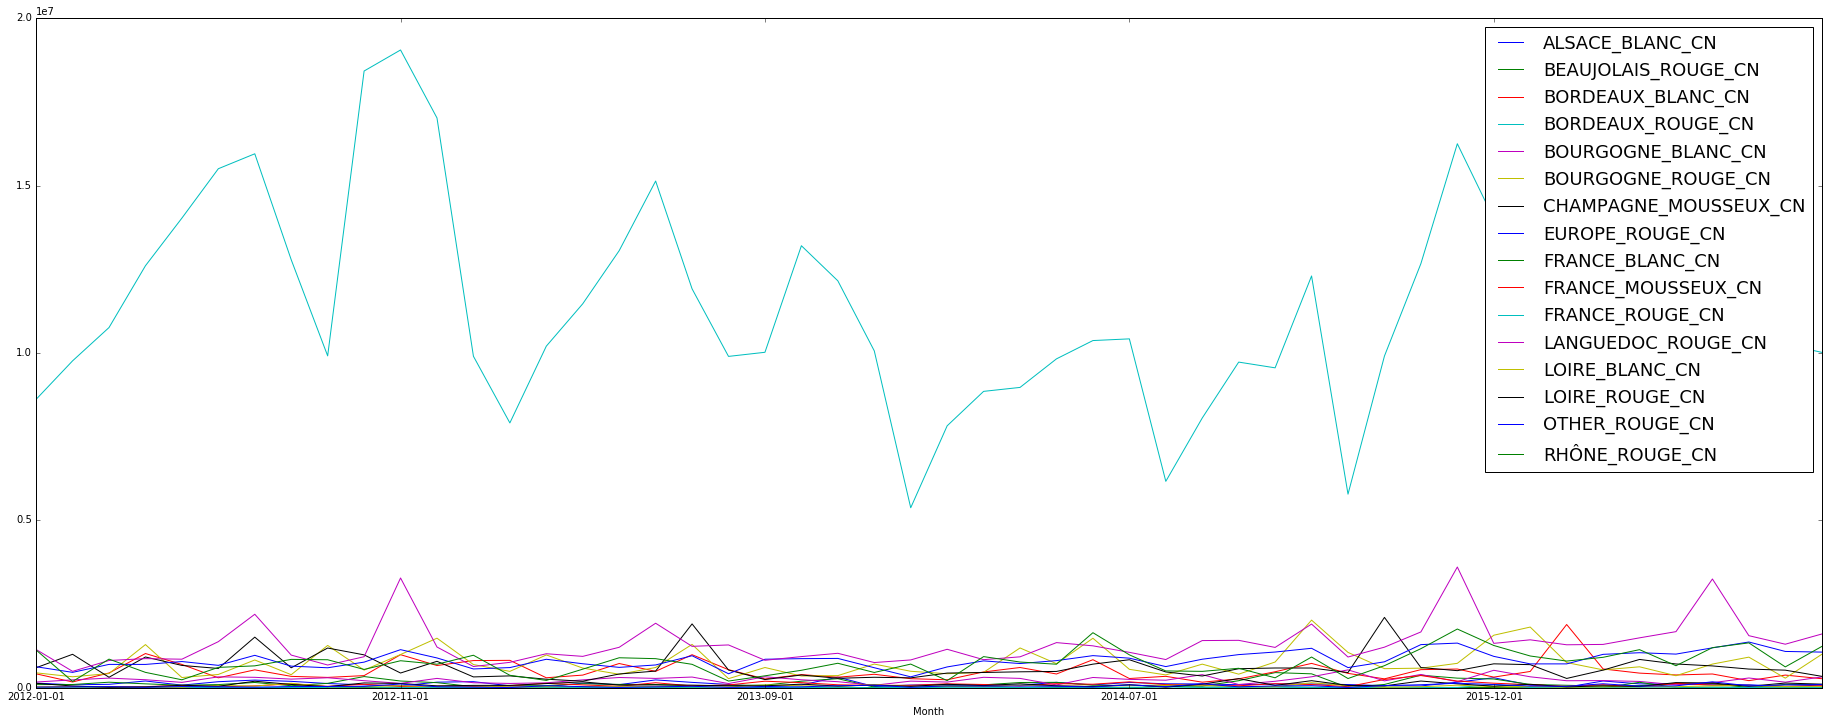

In [115]:
French_Wine_Export_in_Euros_DF.plot('Month' , 
                                    CN_columns,
                                   figsize=(32 , 12)).legend(fontsize=18)

In [49]:
Wines = "ALSACE BEAUJOLAIS BORDEAUX BOURGOGNE CHAMPAGNE EUROPE FRANCE LANGUEDOC LOIRE OTHER RHÔNE".split();
Variants = ['BLANC' , 'MOUSSEUX' , 'ROUGE'];
Countries = ['GB', 'US', 'DE', 'BE', 'CN', 'JP', 'CH', 'HK', 'NL', 'CA' , 'OTHER']



In [65]:
# A lot of possibilities , but only 176 are available ;)
len(Wines) * len(Variants) * len(Countries) 

363

In [106]:
from IPython.display import display


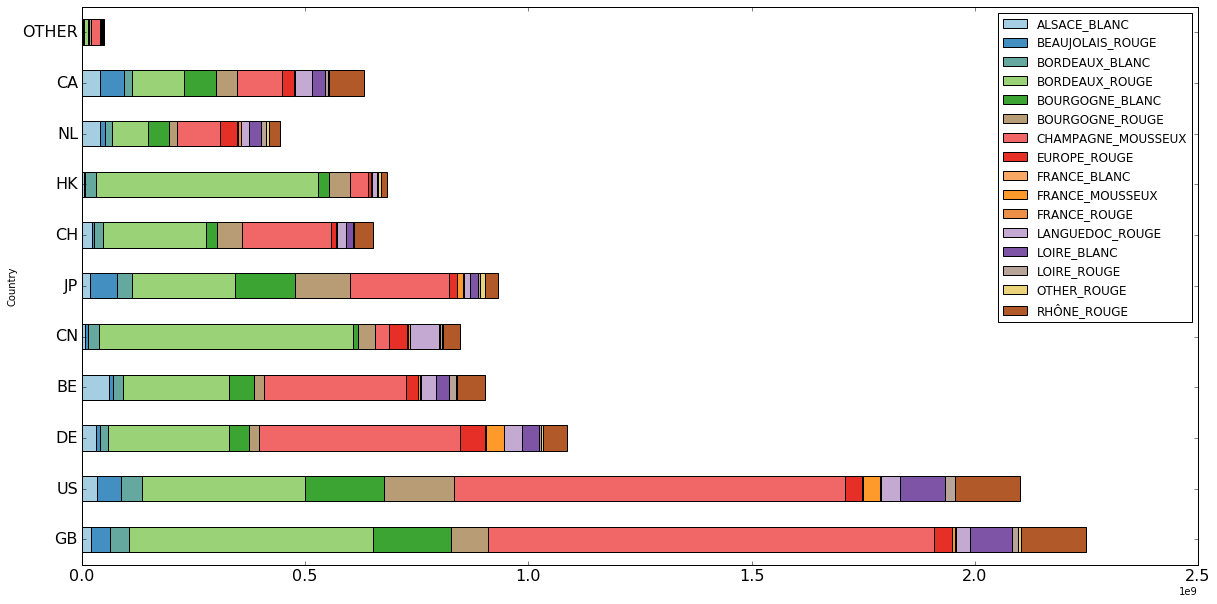

In [119]:
rows = [];
cols = []
for cntry in Countries:
    cntry_columns = [col for col in French_Wine_Export_in_Euros_DF.columns if col.endswith('_' + cntry) ]
    cols = []
    row = [cntry];
    for col in cntry_columns:
        col1 = col.replace('_' + cntry , "")
        sum1 = French_Wine_Export_in_Euros_DF[col].sum()
        row.append(sum1);
        cols.append(col1);
    rows.append(row);

plot_df = pd.DataFrame(rows , columns=['Country'] + cols);

    
plot_df.set_index('Country').plot.barh(stacked=True, figsize=(20,10), fontsize = 16, colormap='Paired').legend(loc='best', fontsize=12)